In [125]:
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
os.environ['TF_CPP_MIN_VLOG_LEVEL'] = '1' # to disable the warning message, only show error message

tf.keras.backend.clear_session()

In [63]:
(X_train_full, y_train_full), (X_test, y_test) = cifar10.load_data()

In [64]:
X_train_full.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [65]:
X_validation = X_train_full[-10_000:]
y_validation = y_train_full[-10_000:]
X_validation.shape, y_validation.shape

((10000, 32, 32, 3), (10000, 1))

In [66]:
X_train = X_train_full[:-10_000]
y_train = y_train_full[:-10_000]
X_train.shape, y_train.shape

((40000, 32, 32, 3), (40000, 1))

In [67]:
np.array(np.unique(y_train, return_counts=True)).T

array([[   0, 3986],
       [   1, 3986],
       [   2, 4048],
       [   3, 3984],
       [   4, 4003],
       [   5, 3975],
       [   6, 4020],
       [   7, 4023],
       [   8, 3997],
       [   9, 3978]])

In [68]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship','truck']
import matplotlib.pyplot as plt

def plot_figures(X, y, n_rows=4, n_cols=10):
    plt.figure(figsize=(n_cols*1.2, n_rows*1.2))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols*row + col
            plt.subplot(n_rows, n_cols, index+1)
            plt.imshow(X[index])
            plt.title(class_names[y[index,0]])
            plt.axis('off')

# plt.figure(figsize=(15,15))
# for i in range(25):
#     plt.subplot(5,5,i+1)
#     plt.imshow(X_train[i])
#     plt.title(class_names[y_train[i,0]])
#     plt.axis('off')

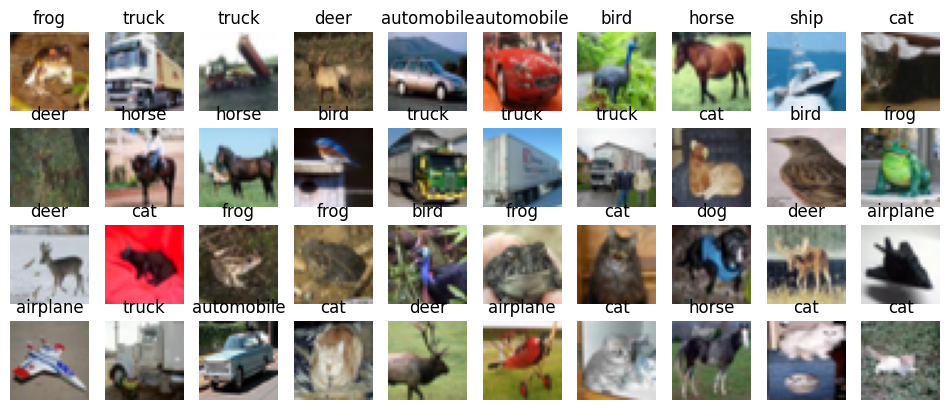

In [69]:
plot_figures(X_train, y_train)

In [70]:
def get_model():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Rescaling(scale=1./255, input_shape=(32, 32, 3)))
    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPool2D(pool_size=2))
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPool2D(pool_size=2))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(units=128, activation='relu'))
    model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
    return model

In [71]:
model = get_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

In [72]:
model.compile(
    loss="categorical_crossentropy",
    metrics="accuracy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
)

### sparse_categorical_crossentropy

Dan moet je niet de one-hot encoding gebruiken, maar de sparse_categorical_crossentropy loss functie. Deze functie doet hetzelfde als de categorical_crossentropy, maar dan met de labels in de vorm van integers.

In [73]:
y_train_encoded = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_validation_encoded = tf.keras.utils.to_categorical(y_validation, num_classes=10)
y_test_encoded = tf.keras.utils.to_categorical(y_test, num_classes=10)
y_train_encoded.shape, y_validation_encoded.shape, X_train.shape, X_validation.shape

((40000, 10), (10000, 10), (40000, 32, 32, 3), (10000, 32, 32, 3))

In [74]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True) # min_delta=0.001

history = model.fit(X_train, y_train_encoded, epochs=1_000, batch_size=32, validation_data=(X_validation, y_validation_encoded), callbacks=[early_stopping_cb])

Epoch 1/1000
1250/1250 [==============================] - 9s 6ms/step - loss: 1.4526 - accuracy: 0.4735 - val_loss: 1.1242 - val_accuracy: 0.6029
Epoch 2/1000
1250/1250 [==============================] - 7s 6ms/step - loss: 0.9961 - accuracy: 0.6469 - val_loss: 0.9226 - val_accuracy: 0.6744
Epoch 3/1000
1250/1250 [==============================] - 7s 6ms/step - loss: 0.8150 - accuracy: 0.7142 - val_loss: 0.8908 - val_accuracy: 0.6928
Epoch 4/1000
1250/1250 [==============================] - 7s 6ms/step - loss: 0.6868 - accuracy: 0.7595 - val_loss: 0.8289 - val_accuracy: 0.7176
Epoch 5/1000
1250/1250 [==============================] - 7s 6ms/step - loss: 0.5780 - accuracy: 0.7959 - val_loss: 0.7965 - val_accuracy: 0.7342
Epoch 6/1000
1250/1250 [==============================] - 8s 6ms/step - loss: 0.4894 - accuracy: 0.8270 - val_loss: 0.8233 - val_accuracy: 0.7279
Epoch 7/1000
1250/1250 [==============================] - 8s 6ms/step - loss: 0.4024 - accuracy: 0.8578 - val_loss: 0.9534 -

In [75]:
def plot_learning_curves(history):
    plt.figure(figsize=(8, 5))
    for key, style in zip(history.history, ["r-o", "r-*", "b-o", "b-*"]):
        epochs = np.array(history.epoch)
        plt.plot(epochs + 1, history.history[key], style, label=key)
    plt.xlabel("Epoch")
    plt.axis([1, len(history.history['loss']), 0., 1])
    plt.legend(loc="lower left")
    plt.grid()

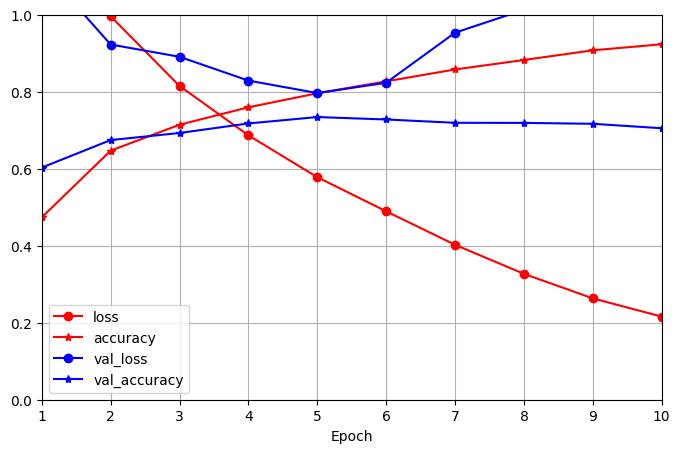

In [76]:
plot_learning_curves(history)

In [77]:
model.evaluate(X_test, y_test_encoded)

313/313 [==============================] - 1s 4ms/step - loss: 0.8001 - accuracy: 0.7309


[0.8001285791397095, 0.73089998960495]

In [79]:
def find_misclassified_images():

    predictions = model.predict(X_test)
    incorrect_predicted_images = []
    expected_labels = []
    predicted_labels = []

    for i in range(len(predictions)):
        if np.argmax(predictions[i]) != y_test[i]:
            incorrect_predicted_images.append(X_test[i])
            expected_labels.append(y_test[i])
            predicted_labels.append(np.argmax(predictions[i]))
    
    return incorrect_predicted_images, expected_labels, predicted_labels

In [80]:
incorrect, expected, predicted = find_misclassified_images()
incorrect = np.array(incorrect)
expected = np.array(expected)
predicted = np.array(predicted)

313/313 [==============================] - 1s 2ms/step


In [81]:
predicted = predicted.reshape(-1, 1)

In [82]:
incorrect.shape, expected.shape, predicted.shape

((2691, 32, 32, 3), (2691, 1), (2691, 1))

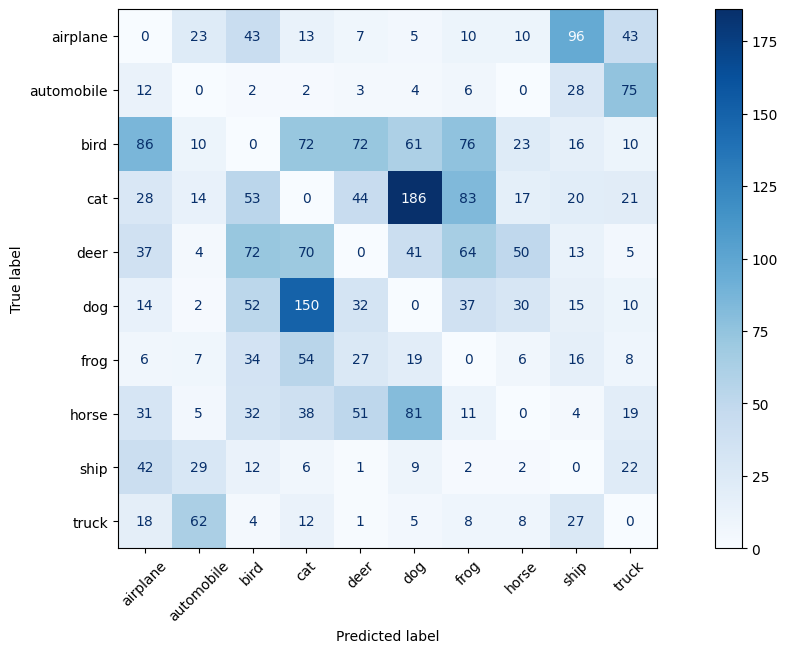

In [95]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(15, 7))
cm = confusion_matrix(expected, predicted)
disp = ConfusionMatrixDisplay(cm, display_labels=class_names)
disp.plot(ax=ax, cmap='Blues')
ax.xaxis.set_ticklabels(class_names, rotation=45)
plt.show()

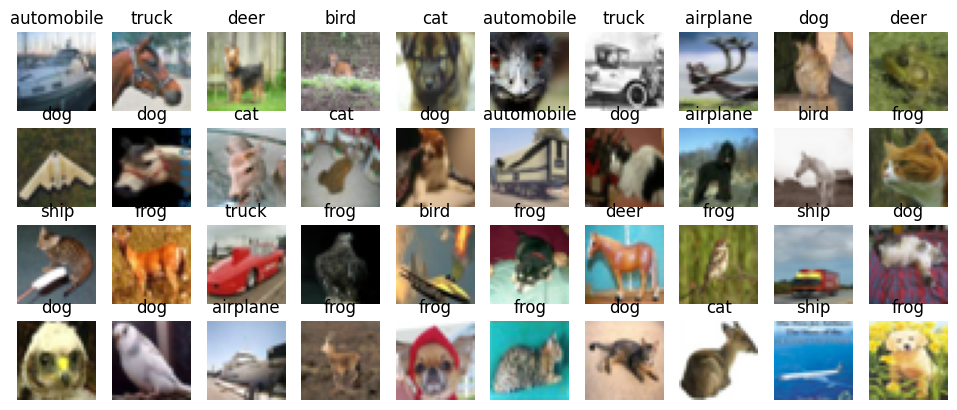

In [83]:
plot_figures(incorrect, predicted, n_rows=4, n_cols=10)

### Improving the model

In [126]:
def get_model():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Rescaling(scale=1./255, input_shape=(32, 32, 3)))

    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, kernel_initializer=tf.keras.initializers.HeNormal(), padding='same', activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(0.25))

    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, kernel_initializer=tf.keras.initializers.HeNormal(), padding='same', activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPool2D(pool_size=2))

    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, kernel_initializer=tf.keras.initializers.HeNormal(), padding='same', activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(0.25))

    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, kernel_initializer=tf.keras.initializers.HeNormal(), padding='same', activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPool2D(pool_size=2))
    ###
    # additional convolutional block
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, kernel_initializer=tf.keras.initializers.HeNormal(), padding='same', activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(0.25))

    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, kernel_initializer=tf.keras.initializers.HeNormal(), padding='same', activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPool2D(pool_size=2))
    ###
    model.add(tf.keras.layers.Flatten())

    model.add(tf.keras.layers.Dense(units=128, kernel_initializer=tf.keras.initializers.HeNormal(), activation='relu'))
    model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
    return model

In [127]:
model = get_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                       

In [128]:
def learning_rate_scheduler(epoch):
    initial_lr = 0.001
    drop = 0.5
    epochs_drop = 10.0
    lr = initial_lr * np.power(drop, np.floor((1+epoch)/epochs_drop))
    return lr

In [129]:
model.compile(
    loss="categorical_crossentropy",
    metrics="accuracy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
)

In [130]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True, min_delta=0.001)
lr_scheduler_cb = tf.keras.callbacks.LearningRateScheduler(learning_rate_scheduler)

history = model.fit(X_train, y_train_encoded, epochs=100, batch_size=32, validation_data=(X_validation, y_validation_encoded), callbacks=[early_stopping_cb, lr_scheduler_cb])

Epoch 1/100


2023-10-17 10:31:31.632934: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1250/1250 [==============================] - 14s 10ms/step - loss: 1.4709 - accuracy: 0.4669 - val_loss: 1.2584 - val_accuracy: 0.5600 - lr: 0.0010
Epoch 2/100
1250/1250 [==============================] - 11s 9ms/step - loss: 1.0010 - accuracy: 0.6455 - val_loss: 0.9530 - val_accuracy: 0.6735 - lr: 0.0010
Epoch 3/100
1250/1250 [==============================] - 11s 9ms/step - loss: 0.8091 - accuracy: 0.7138 - val_loss: 0.8699 - val_accuracy: 0.7093 - lr: 0.0010
Epoch 4/100
1250/1250 [==============================] - 10s 8ms/step - loss: 0.7025 - accuracy: 0.7515 - val_loss: 0.7601 - val_accuracy: 0.7377 - lr: 0.0010
Epoch 5/100
1250/1250 [==============================] - 11s 9ms/step - loss: 0.6227 - accuracy: 0.7814 - val_loss: 0.6900 - val_accuracy: 0.7646 - lr: 0.0010
Epoch 6/100
1250/1250 [==============================] - 11s 9ms/step - loss: 0.5630 - accuracy: 0.8008 - val_loss: 0.6538 - val_accuracy: 0.7785 - lr: 0.0010
Epoch 7/100
1250/1250 [==============================] - 

### Evaluation when kernel initializer is added

In [111]:
# model.evaluate(X_test, y_test_encoded)

313/313 [==============================] - 1s 4ms/step - loss: 0.8442 - accuracy: 0.7272


[0.8441706895828247, 0.7271999716758728]

### Evaluation when extra conv block is added

In [100]:
# model.evaluate(X_test, y_test_encoded)

313/313 [==============================] - 1s 4ms/step - loss: 0.8223 - accuracy: 0.7131


[0.8223018646240234, 0.713100016117096]

### Evaluation after adding extra conv block, kernel initializer, batch normalization and dropout

In [117]:
# model.evaluate(X_test, y_test_encoded)

313/313 [==============================] - 1s 5ms/step - loss: 0.6498 - accuracy: 0.7805


[0.6497980952262878, 0.7804999947547913]

### Evaluation after adding extra conv block, kernel initializer, batch normalization, dropout, min_delta=0.001 to early stopping cb and learning rate scheduler

In [124]:
# model.evaluate(X_test, y_test_encoded)

313/313 [==============================] - 1s 5ms/step - loss: 0.6216 - accuracy: 0.8068


[0.6216214895248413, 0.8068000078201294]

### Evaluation after adding extra conv block, kernel initializer, batch normalization, dropout and learning rate scheduler

In [131]:
# model.evaluate(X_test, y_test_encoded)

313/313 [==============================] - 1s 5ms/step - loss: 0.6338 - accuracy: 0.8063


[0.6337562203407288, 0.8062999844551086]